## Import Dependencies

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

%matplotlib inline 

## Uploading data

In [2]:
full_dataset = pd.read_csv("data/Tweets.csv")

## Exploring data

In [38]:
full_dataset.head(3) 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [34]:
full_dataset.shape

(14640, 15)

The dataset contains 14640 observations and 15 variables

In [5]:
full_dataset.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 10.7 MB


We have 11 categorical features, one of which is the target, and 4 continuous ones.

#### Checking the distribution of the target variable

In [240]:
plt.style.available


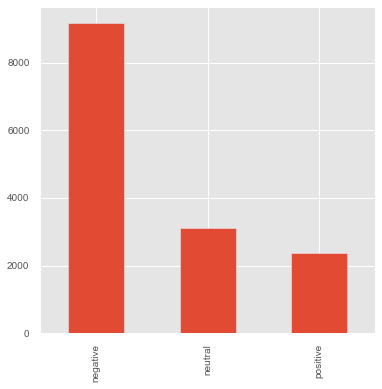

In [106]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(6,6))

full_dataset['airline_sentiment'].value_counts().plot(kind='bar', legend = False, ax=ax)

Most of the observations have negative sentiment

#### Creating word cloud for every sentiment group

In [61]:
# Creating a dictionery {sentiment : all the text from the sentiment group}
sentiment_texts = {sentiment : " ".join(tweet for tweet in sentiment_df.text)
     for sentiment, sentiment_df in full_dataset.groupby('airline_sentiment')}

In [96]:
stopwords = set(STOPWORDS)
stopwords.update(["united","SouthwestAir","USAirways","JetBlue","AmericanAir","VirginAmerica","co","flight","will"])

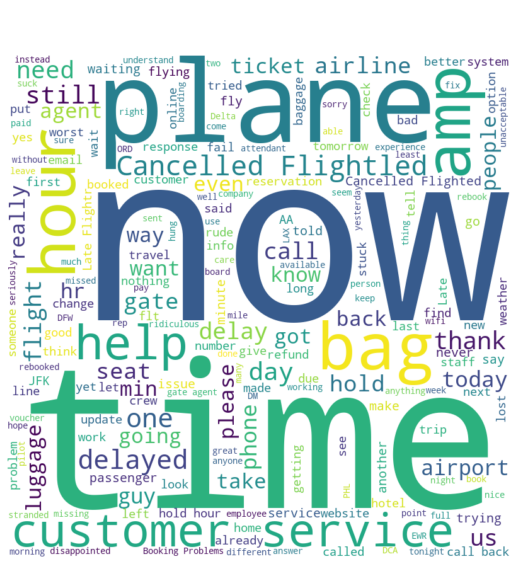

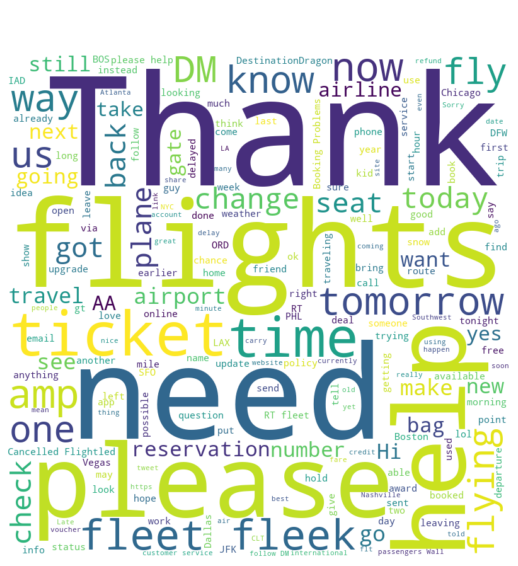

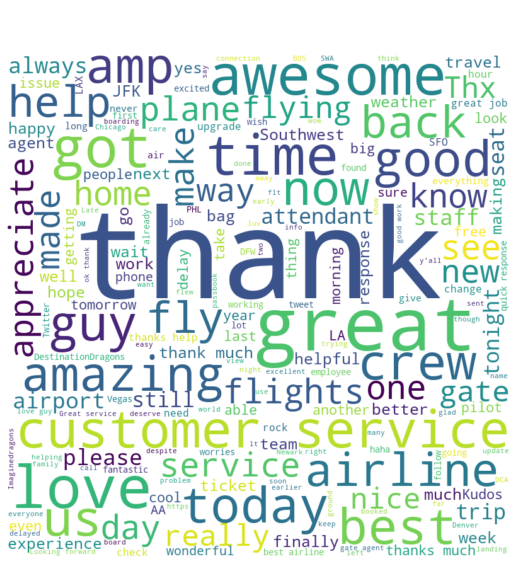

In [97]:
# Create and generate a word cloud image
for sentiment, text in sentiment_texts.items():

    wordcloud = WordCloud(stopwords=stopwords, width = 800, height = 800,background_color="white", min_font_size = 10).generate(text)
    
    # Display the generated image:
    plt.figure(figsize = (7, 7), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0) 
    plt.title(sentiment.capitalize(), pad = 20,fontdict = {'fontsize' : 40,"color" : "black"})
    plt.show() 

As we can see, in negative tweets most common words are "customer service", "delay", "time" etc.
And in positive we see a lot of kind adjectives and nouns. 

#### Let's check the first few tweets with the highest confidence

In [114]:
# By the way, people retweet negative tweets mostly, which makes sense since a human is a ferocious creature
full_dataset.groupby("airline_sentiment")["retweet_count"].sum()

airline_sentiment
negative    857
neutral     189
positive    164
Name: retweet_count, dtype: int64

In [155]:
temp_df = full_dataset.sort_values(by=['airline_sentiment_confidence'],ascending=False)[['airline_sentiment','airline_sentiment_confidence','text']][:3]

for sentiment, confidence, text in temp_df.values:
    print(f"{sentiment}  {confidence}\n {text}\n")

neutral  1.0
 @VirginAmerica What @dhepburn said.

negative  1.0
 @AmericanAir I really wanted to sign up for your airline credit card but your absurd $400 change fee to switch my flight made me think twice

positive  1.0
 @JetBlue They just came out. Thanks for the follow-up. That's why you're the best!



The features of positive and negative commentary are quite clearly displayed.

#### Checking the main reason of the bad tweets

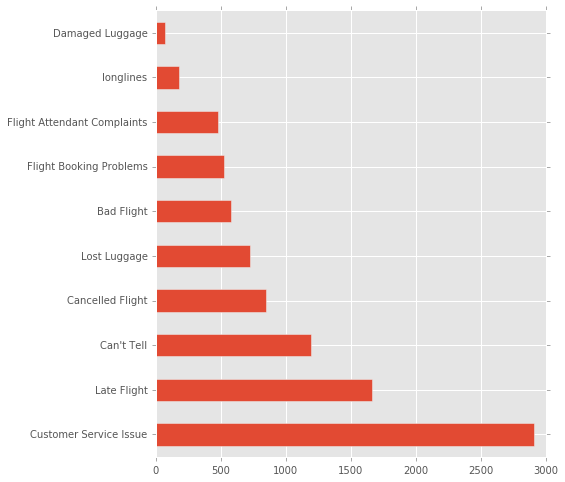

In [186]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,8))

full_dataset['negativereason'].value_counts().plot(kind='barh', legend = False, ax=ax)

Most negative tweets are connected to "Cursomer service Issue", which just proofs our word cloud

#### Checking distribution of the airlines

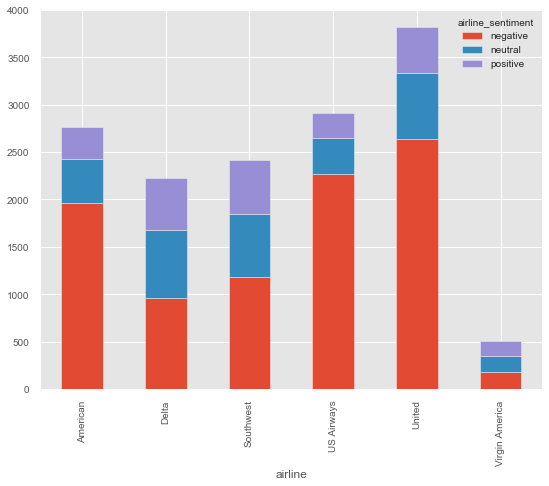

In [156]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9,7))

full_dataset.groupby(['airline', 'airline_sentiment']).size().unstack().plot(
                            kind='bar', legend = True, ax=ax, stacked = True)

Here we can see that people mention "United" airline most often. Moreover, almost half of the tweets for each company consist of negative messages, which is not surprising since if people are pleased they want to change nothing, but when they are unsatisfied, people try to get refund.

#### Working with datetime

In [192]:
full_dataset['tweet_created'] = pd.to_datetime(full_dataset['tweet_created']) 

In [208]:
date_tweet_created = pd.Series([date.date() for date in full_dataset['tweet_created']])
date_tweet_created[:3]

0    2015-02-24
1    2015-02-24
2    2015-02-24
dtype: object

In [213]:
date_and_sentiment_df = pd.concat([full_dataset['airline_sentiment'],date_tweet_created], axis=1,keys = ["airline_sentiment","tweet_created"])
date_and_sentiment_df.head()

,airline_sentiment,tweet_created
0,neutral,2015-02-24
1,positive,2015-02-24
2,neutral,2015-02-24
3,negative,2015-02-24
4,negative,2015-02-24


In [221]:
date_and_sentiment_df[date_and_sentiment_df['airline_sentiment'].str.contains("negative")].groupby('tweet_created').count(
                                                                    ).sort_values(by = "airline_sentiment",ascending=False)

,airline_sentiment
tweet_created,
2015-02-22,2266
2015-02-23,1919
2015-02-21,1049
2015-02-17,838
2015-02-20,835
2015-02-24,781
2015-02-19,751
2015-02-18,736
2015-02-16,3


The largest number of complaints received on February 22

#### Text length stats

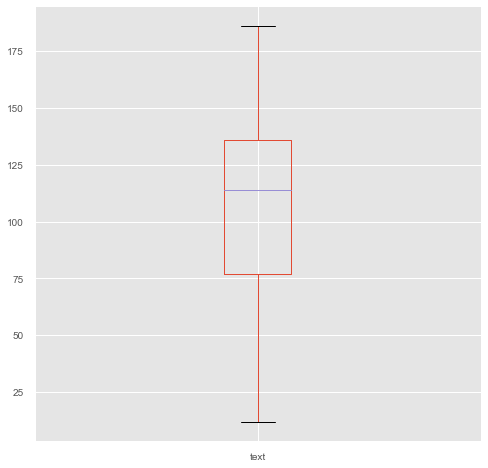

In [245]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,8))

full_dataset['text'].str.len().plot(kind='box', legend = False, ax=ax)

In [243]:
full_dataset['text'].str.len().describe()[['mean','min','max']]

mean    103.822063
min      12.000000
max     186.000000
Name: text, dtype: float64

The shortest tweet contains 12 characters and the longest one 189, and in general mean tweet length is 104 characters

#### Managing with duplicates

In [254]:
full_dataset.duplicated().any()

True

In [255]:
full_dataset.drop_duplicates(inplace = True) 

## Creating language model